In [1]:
from matplotlib import pyplot as plt 
import numpy as np  
%matplotlib inline
from tqdm import tqdm

In [2]:
import sys
sys.path.append('../lib')
from simlib import *

In [3]:
def th_mean(t, x0=0, D=1, k=1, beta=1):
    return x0 * np.exp(-D*k*beta*t)

def th_var(t, D=1, k=1, beta=1):
    return 1/np.sqrt(k*beta) * (1-np.exp(-2*D*k*beta*t))

In [4]:
method = 'lang'
max_t = 10
dt = 0.1
x0 = 2
D = 1
beta = 1
k = 1
num_steps = int(max_t/dt)

In [20]:
All_Ns = [100, 200, 500, 700, 1000, 2000, 5000, 7000, 10000, 20000, 30000, 40000, 50000, 60000, 70000]

In [21]:
RMSD_mean_mean = []
RMSD_mean_std = []

RMSD_var_mean = []
RMSD_var_std = []

for i, N in enumerate(All_Ns):
    RMSD_mean = []
    RMSD_var = []
    for _ in tqdm(range(10)):
        ts, xs = simulate(harmonic_potential(k=k), method=method,
                              num_particles=N, dt=dt, max_t=max_t,
                              x0=x0, D=D, beta=beta)

        mean_predict = th_mean(ts, x0)
        mean_sim = np.mean(xs, axis=1)
        RMSD_mean.append(np.sqrt(np.mean((mean_sim-mean_predict)**2)))

        var_predict = th_var(ts)
        var_sim = np.var(xs, axis=1)
        RMSD_var.append(np.sqrt(np.mean((var_sim-var_predict)**2)))
    
    RMSD_mean_mean.append(np.mean(RMSD_mean))
    RMSD_mean_std.append(np.std(RMSD_mean))
    
    RMSD_var_mean.append(np.mean(RMSD_var))
    RMSD_var_std.append(np.std(RMSD_var))

100%|██████████| 10/10 [03:05<00:00, 18.54s/it]


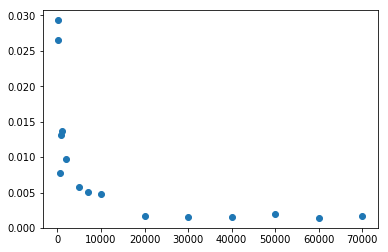

In [22]:
plt.plot(All_Ns, RMSD_var_std, 'o')

In [24]:
dt = 0.05

RMSD_mean_mean2 = []
RMSD_mean_std2 = []

RMSD_var_mean2 = []
RMSD_var_std2 = []

for i, N in enumerate(All_Ns):
    RMSD_mean = []
    RMSD_var = []
    for _ in tqdm(range(10)):
        ts, xs = simulate(harmonic_potential(k=k), method=method,
                              num_particles=N, dt=dt, max_t=max_t,
                              x0=x0, D=D, beta=beta)

        mean_predict = th_mean(ts, x0)
        mean_sim = np.mean(xs, axis=1)
        RMSD_mean.append(np.sqrt(np.mean((mean_sim-mean_predict)**2)))

        var_predict = th_var(ts)
        var_sim = np.var(xs, axis=1)
        RMSD_var.append(np.sqrt(np.mean((var_sim-var_predict)**2)))
    
    RMSD_mean_mean2.append(np.mean(RMSD_mean))
    RMSD_mean_std2.append(np.std(RMSD_mean))
    
    RMSD_var_mean2.append(np.mean(RMSD_var))
    RMSD_var_std2.append(np.std(RMSD_var))


100%|██████████| 10/10 [00:00<00:00, 15.58it/s]

100%|██████████| 10/10 [00:01<00:00,  7.59it/s]

100%|██████████| 10/10 [06:16<00:00, 37.68s/it]


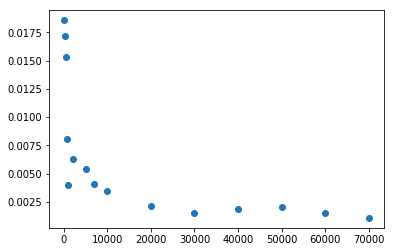

In [25]:
plt.plot(All_Ns, RMSD_var_std2, 'o')

In [27]:
with open('../data/harmonic_RMSD.data', 'w') as f:
    for N, rm1, drm1, rv1, drv1, rm2, drm2, rv2, drv2 in zip(All_Ns,
                                                             RMSD_mean_mean, RMSD_mean_std, RMSD_var_mean, RMSD_var_std,
                                                             RMSD_mean_mean2, RMSD_mean_std2, RMSD_var_mean2, RMSD_var_std2):
        f.write('{} {} {} {} {} {} {} {} {}\n'.format(N,
                                                      rm1, drm1, rv1, drv1,
                                                      rm2, drm2, rv2, drv2))